# School Census Analysis

The dataset we will use is from the American Statistical 
Association’s [U.S. Census at School](https://ww2.amstat.org/censusatschool/) project and consists 
of a wide array of questions answered by American school 
students from all states and most grades. A 500-record dataset
has been sampled and downloaded from this project and presented 
as an Excel file at http://bit.ly/2VuOA98

No meta-data are available for this dataset. Fortunately, most of the 
field names are self-explanatory, although there may be a wide 
variation in how individual participants answered the questions.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

## Import and Initial Cleaning

The dataset has a very large number of columns. We will load the table from 
the Internet, then copy two columns regarding self-reported hours spent watching
television and hours spent doing homework to a new dataframe. Finally, rename
the columns for easier referencing.

In [2]:
df = pd.read_excel("http://bit.ly/2VuOA98")
dfhours = df[['Watching_TV_Hours', 'Doing_Homework_Hours']]
dfhours.dtypes
dfhours.columns = ['tv', 'homework']

---
Check for unique values in the remaining columns and remove non-numeric values, 
with extreme prejudice.

In [3]:
print(dfhours.tv.unique())
print(dfhours.homework.unique())

dfhours.tv = pd.to_numeric(dfhours.tv, errors='coerce')
dfhours.homework = pd.to_numeric(dfhours.homework, errors='coerce')

[nan 49 24 20 5 2 0 4 8 3 10 1 6 28 9 12 25 7 0.5 15 30 50 14 100 90 35 45
 11 21 56 26 22 16 42 70 datetime.datetime(2019, 1, 2, 0, 0) 40]
[nan 3 5 20 1 10 7 4 16 15 9 0 8 6 2 44 12 30 21 24 35 19 25 14 18 28 56 11
 32 22 100 26 7.5 48 datetime.datetime(2019, 12, 14, 0, 0) 55 40 60 23 50]


---
Check for a strong correlation between columns. 

In [4]:
dfhours.corr()

,tv,homework
tv,1.000000,0.215891
homework,0.215891,1.000000


---
There doesn't seem to be much going on. Let's confirm with the scatter plot:

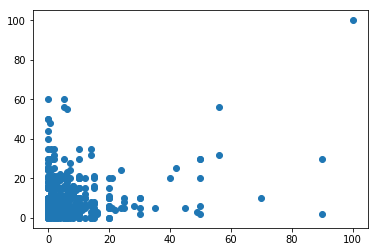

In [5]:
plt.scatter(dfhours.tv, dfhours.homework)
plt.show()

---
I have a strong suspicion that there are comparatively few data points above 20-30 hours. The data point at 100 hours is cleary a joke. Let's do a histogram of both columns to assess:

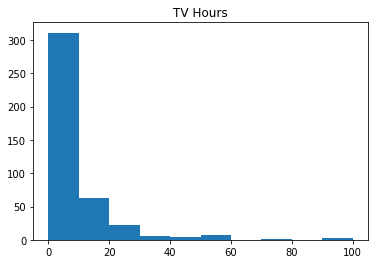

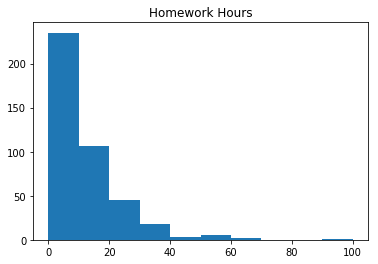

In [6]:
dfhours = dfhours.dropna()

len(dfhours.dropna())

plt.hist(dfhours.tv)
plt.title('TV Hours')
plt.show()
plt.hist(dfhours.homework)
plt.title('Homework Hours')
plt.show()


---
The reported TV hours are predominantly below 20, while the reported homework hours are predominantly below 30. This can be confirmed with a quick statistical description. Let's look for anything below the 95th percentile:

In [7]:
dfhours.describe(percentiles = [0.25, 0.5, 0.95])

,tv,homework
count,416.000000,416.000000
mean,7.612981,10.578125
std,12.264720,11.331395
min,0.000000,0.000000
25%,1.000000,3.000000
50%,4.000000,7.000000
95%,25.750000,30.000000
max,100.000000,100.000000


Accordingly, let's drop any rows with more than 26 TV hours or more than 30 homework hours:

In [8]:
dfhours = dfhours[dfhours.tv <= 26]
dfhours = dfhours[dfhours.homework <= 30]

---
Finally, let's double-check to confirm that the histograms look more reasonable, that we still 
have a decent sized data set and that the correlation is still weak:

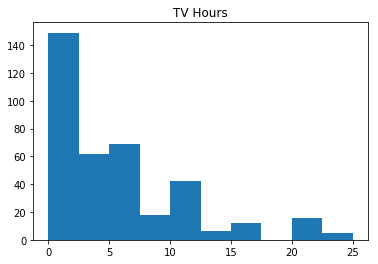

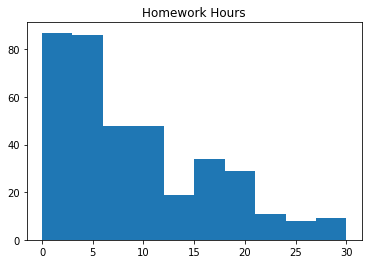

,tv,homework
count,379.000000,379.000000
mean,5.373351,8.679420
std,5.571783,7.302478
min,0.000000,0.000000
25%,1.000000,3.000000
50%,4.000000,6.000000
75%,8.000000,14.000000
max,25.000000,30.000000


In [9]:
plt.hist(dfhours.tv)
plt.title('TV Hours')
plt.show()
plt.hist(dfhours.homework)
plt.title('Homework Hours')
plt.show()
dfhours.describe()

In [10]:
dfhours.corr()

,tv,homework
tv,1.000000,-0.025822
homework,-0.025822,1.000000


The correlation is not just weak, it's virtually non-existant. There doesn't seem to be any connection between watching TV and doing homework, as reported by these youngsters. Just for fun, though, let's do the scatter plot:

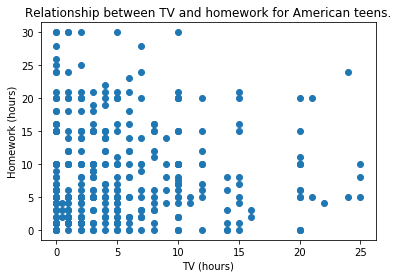

In [11]:
plt.scatter(dfhours.tv, dfhours.homework)
plt.title('Relationship between TV and homework for American teens.')
plt.xlabel('TV (hours)')
plt.ylabel('Homework (hours)')
plt.show()

## Statistical Significance

We can also compute the p value using scipy:

In [12]:
from scipy.stats import pearsonr
pearsonr(dfhours.tv, dfhours.homework)

(-0.025821712302087432, 0.616287961115634)

The second number is the p-value. According to _Statistics For Dummies, 2nd Edition_, if the null hypothesis is that there is no relationship between the data sets, then a p-value above 0.05 indicates 
weak evidence against the null hypothesis, so you fail to reject the null hypothesis. In other words, 
there is no statistically significant correlation between TV watching and homework doing. 

## Conclusion

In spite of an intuitive sense that students who watch a lot of TV probably don't do much homework, 
our analysis of TV and homework hours (presumably per week) as self-reported by some population of
American high-school students, indicates that there is no significant relationship between the two. 